In [355]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from collections import Counter
import numpy as np

In [356]:
df=pd.read_csv("data/listings.csv")

In [357]:
df.head() 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250911031321,2025-09-11,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.93,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.87
1,28871,https://www.airbnb.com/rooms/28871,20250911031321,2025-09-11,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.93,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.99
2,29051,https://www.airbnb.com/rooms/29051,20250911031321,2025-09-11,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.81
3,44391,https://www.airbnb.com/rooms/44391,20250911031321,2025-09-11,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,48373,https://www.airbnb.com/rooms/48373,20250911031321,2025-09-11,previous scrape,Cozy family home in Amsterdam South,Charming modern apartment in the quiet and gre...,Apartment is located between Amsterdamse Bos a...,https://a0.muscache.com/pictures/miso/Hosting-...,220434,...,5.00,4.60,5.00,0363 4A2B A6AD 0196 F684,f,1,1,0,0,0.19


In [358]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10480 non-null  int64  
 1   listing_url                                   10480 non-null  object 
 2   scrape_id                                     10480 non-null  int64  
 3   last_scraped                                  10480 non-null  object 
 4   source                                        10480 non-null  object 
 5   name                                          10480 non-null  object 
 6   description                                   10132 non-null  object 
 7   neighborhood_overview                         5192 non-null   object 
 8   picture_url                                   10480 non-null  object 
 9   host_id                                       10480 non-null 

There are 4606 number of company that do not have any price value provided, so when can simple drop those column

In [359]:
# create list of row indices where the price is null/blank
row_indices=df.index[(df["price"].isnull())].tolist()
row_indices 

[3, 4, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 24, 26, 27, 28, 29, 32, 34, 36, 37, 38, 47, 49, 52, 58, 61, 66, 67, 69, 76, 78, 79, 80, 81, 84, 86, 87, 90, 91, 94, 101, 103, 104, 105, 110, 116, 117, 118, 119, 120, 121, 126, 127, 131, 132, 135, 136, 138, 139, 142, 146, 147, 149, 151, 153, 155, 157, 159, 160, 161, 164, 168, 177, 178, 183, 193, 194, 196, 201, 206, 208, 209, 216, 218, 219, 222, 226, 227, 231, 237, 238, 241, 242, 250, 253, 255, 257, 259, 263, 264, 265, 267, 269, 270, 273, 274, 276, 279, 283, 288, 290, 292, 293, 294, 298, 300, 301, 303, 307, 309, 310, 312, 315, 317, 318, 322, 326, 327, 329, 331, 336, 340, 341, 344, 345, 346, 347, 348, 350, 352, 356, 361, 364, 367, 368, 369, 372, 374, 376, 378, 380, 382, 383, 384, 385, 386, 387, 388, 390, 392, 396, 398, 400, 403, 406, 409, 410, 413, 418, 420, 423, 427, 429, 431, 433, 440, 442, 443, 447, 448, 454, 456, 462, 463, 464, 466, 478, 479, 480, 481, 482, 483, 489, 490, 491, 492, 494, 495, 497, 498, 500, 501, 504, 505, 506, 507, 509, 510

In [360]:
df.drop(index=row_indices,inplace=True) 

In [361]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 10479
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5874 non-null   int64  
 1   listing_url                                   5874 non-null   object 
 2   scrape_id                                     5874 non-null   int64  
 3   last_scraped                                  5874 non-null   object 
 4   source                                        5874 non-null   object 
 5   name                                          5874 non-null   object 
 6   description                                   5657 non-null   object 
 7   neighborhood_overview                         2755 non-null   object 
 8   picture_url                                   5874 non-null   object 
 9   host_id                                       5874 non-null   int64

In [362]:
df.tail(10) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10470,1502865938487978016,https://www.airbnb.com/rooms/1502865938487978016,20250911031321,2025-09-11,city scrape,Cosy one bedroom apartment in Amsterdam Noord,"Kick back and relax in this calm, stylish spac...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,102449031,...,NaN,NaN,NaN,0363 2AB1 E13E D42F 386D,f,1,1,0,0,NaN
10471,1503145545400026458,https://www.airbnb.com/rooms/1503145545400026458,20250911031321,2025-09-11,city scrape,Downtown apartment w/terrasse and view to a canal,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22534485,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
10472,1503399985423712696,https://www.airbnb.com/rooms/1503399985423712696,20250911031321,2025-09-11,city scrape,The Staal House,"Welcome to The Staal House, your cozy Amsterda...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,420845707,...,NaN,NaN,NaN,0363 7302 7B95 4CF8 8169,t,1,1,0,0,NaN
10473,1503475250056511603,https://www.airbnb.com/rooms/1503475250056511603,20250911031321,2025-09-11,city scrape,Comfortable spacious apartment in great location,Comfortable and spacious apartment located clo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,175885486,...,NaN,NaN,NaN,0363 AA29 4900 1AD4 76A9,f,1,1,0,0,NaN
10474,1503528945274992542,https://www.airbnb.com/rooms/1503528945274992542,20250911031321,2025-09-11,city scrape,Pearl of the Cuyp | Modern Comfort in De Pijp,- Renovated 2-bedroom apartment in lively De P...,"You’ll be staying in De Pijp, one of Amsterdam...",https://a0.muscache.com/pictures/hosting/Hosti...,717346955,...,NaN,NaN,NaN,0363 033B 7FC4 5C3A DB9F,t,1,1,0,0,NaN
10475,1503867342263201504,https://www.airbnb.com/rooms/1503867342263201504,20250911031321,2025-09-11,city scrape,"test host, don't book",NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,78127165,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
10476,1504985777531398085,https://www.airbnb.com/rooms/1504985777531398085,20250911031321,2025-09-11,city scrape,Bright studio with canal view,This is bright and stylish fully furnished stu...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,613779,...,NaN,NaN,NaN,0363F7E548AEB29F3BA3,f,4,4,0,0,NaN
10477,1504998100462399057,https://www.airbnb.com/rooms/1504998100462399057,20250911031321,2025-09-11,city scrape,Bright & Spacious Luxury Corner Apartment,Experience Amsterdam in style at our 100 m² pr...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,715849738,...,NaN,NaN,NaN,0363 5876 BBB2 EF1F 097D,f,1,1,0,0,NaN
10478,1505255613607359391,https://www.airbnb.com/rooms/1505255613607359391,20250911031321,2025-09-11,city scrape,Bright and Spacious Ground Floor App. with Garden,Enjoy a bright and modern one-bedroom apartmen...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,31681093,...,NaN,NaN,NaN,0363 3146 D0B7 73A7 E9FA,f,1,1,0,0,NaN
10479,1506287353709120640,https://www.airbnb.com/rooms/1506287353709120640,20250911031321,2025-09-11,city scrape,Stylish & cozy apartment in Amsterdam West,Welcome to our sun-drenched apartment on the 3...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,32442604,...,NaN,NaN,NaN,0363 044C 2949 EABC E0B8,f,1,1,0,0,NaN


In [363]:
# X=df.drop(columns=["price"])
# y=df.price 

In [364]:
# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

In [365]:
# X_test['price']=y_test
# X_train['price']=y_train 

# train_data=X_train
# test_data=X_test

# print(f"train_data datapoints: {len(train_data)}")
# print(f"test_data datapoints: {len(test_data)}")


In [366]:
# train_data[:10] 

In [367]:
col_nunique={} 
for i in df.columns: 
    col_nunique.update({f"{i}": df[f"{i}"].nunique()})
col_nunique  

{'id': 5874, 'listing_url': 5874, 'scrape_id': 1, 'last_scraped': 1, 'source': 1, 'name': 5751, 'description': 5470, 'neighborhood_overview': 2489, 'picture_url': 5818, 'host_id': 5045, 'host_url': 5045, 'host_name': 2543, 'host_since': 2805, 'host_location': 124, 'host_about': 2504, 'host_response_time': 4, 'host_response_rate': 64, 'host_acceptance_rate': 101, 'host_is_superhost': 2, 'host_thumbnail_url': 4960, 'host_picture_url': 4960, 'host_neighbourhood': 64, 'host_listings_count': 35, 'host_total_listings_count': 46, 'host_verifications': 7, 'host_has_profile_pic': 2, 'host_identity_verified': 2, 'neighbourhood': 32, 'neighbourhood_cleansed': 22, 'neighbourhood_group_cleansed': 0, 'latitude': 4858, 'longitude': 5212, 'property_type': 57, 'room_type': 4, 'accommodates': 13, 'bathrooms': 15, 'bathrooms_text': 23, 'bedrooms': 11, 'beds': 22, 'amenities': 5696, 'price': 663, 'minimum_nights': 42, 'maximum_nights': 104, 'minimum_minimum_nights': 37, 'maximum_minimum_nights': 44, 'mini

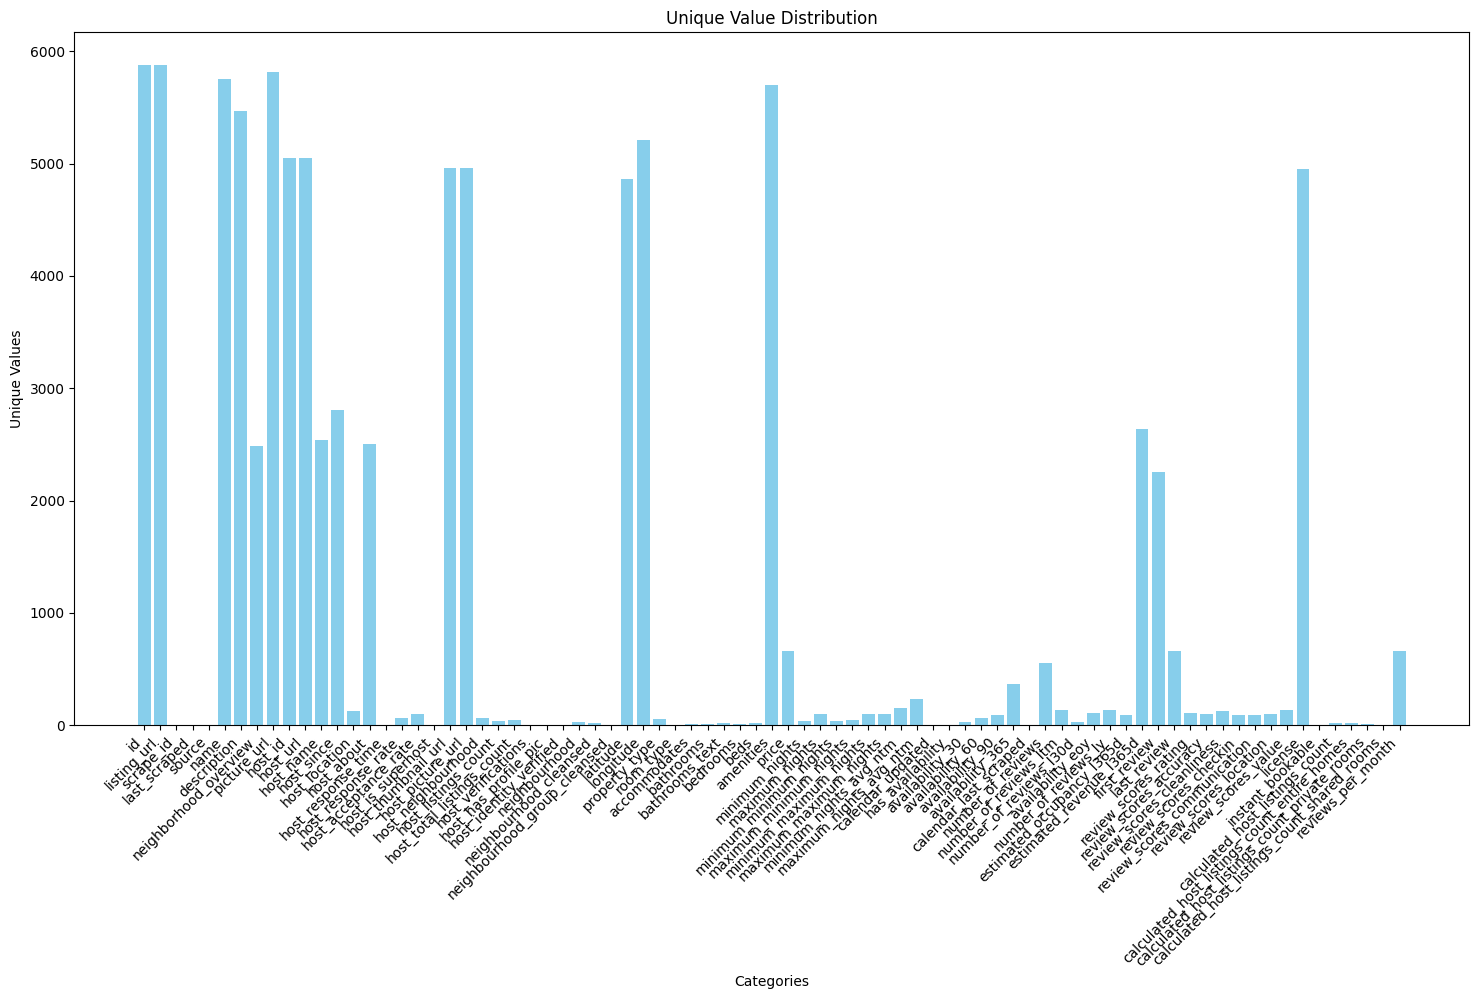

In [368]:
categories=col_nunique.keys()
no_unique_values=col_nunique.values()

plt.figure(figsize=(18,9))
plt.bar(categories, no_unique_values, color="skyblue")
plt.xlabel("Categories")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Unique Values")
plt.title("Unique Value Distribution")

plt.show()

In [369]:
categories_null_count={}
for i in df.columns:
    categories_null_count.update({i:int(df[f"{i}"].isnull().sum())})
categories_null_count 

{'id': 0, 'listing_url': 0, 'scrape_id': 0, 'last_scraped': 0, 'source': 0, 'name': 0, 'description': 217, 'neighborhood_overview': 3119, 'picture_url': 0, 'host_id': 0, 'host_url': 0, 'host_name': 2, 'host_since': 2, 'host_location': 689, 'host_about': 2752, 'host_response_time': 851, 'host_response_rate': 851, 'host_acceptance_rate': 393, 'host_is_superhost': 59, 'host_thumbnail_url': 2, 'host_picture_url': 2, 'host_neighbourhood': 4431, 'host_listings_count': 2, 'host_total_listings_count': 2, 'host_verifications': 2, 'host_has_profile_pic': 2, 'host_identity_verified': 2, 'neighbourhood': 3119, 'neighbourhood_cleansed': 0, 'neighbourhood_group_cleansed': 5874, 'latitude': 0, 'longitude': 0, 'property_type': 0, 'room_type': 0, 'accommodates': 0, 'bathrooms': 0, 'bathrooms_text': 6, 'bedrooms': 9, 'beds': 3, 'amenities': 0, 'price': 0, 'minimum_nights': 0, 'maximum_nights': 0, 'minimum_minimum_nights': 4, 'maximum_minimum_nights': 4, 'minimum_maximum_nights': 4, 'maximum_maximum_nigh

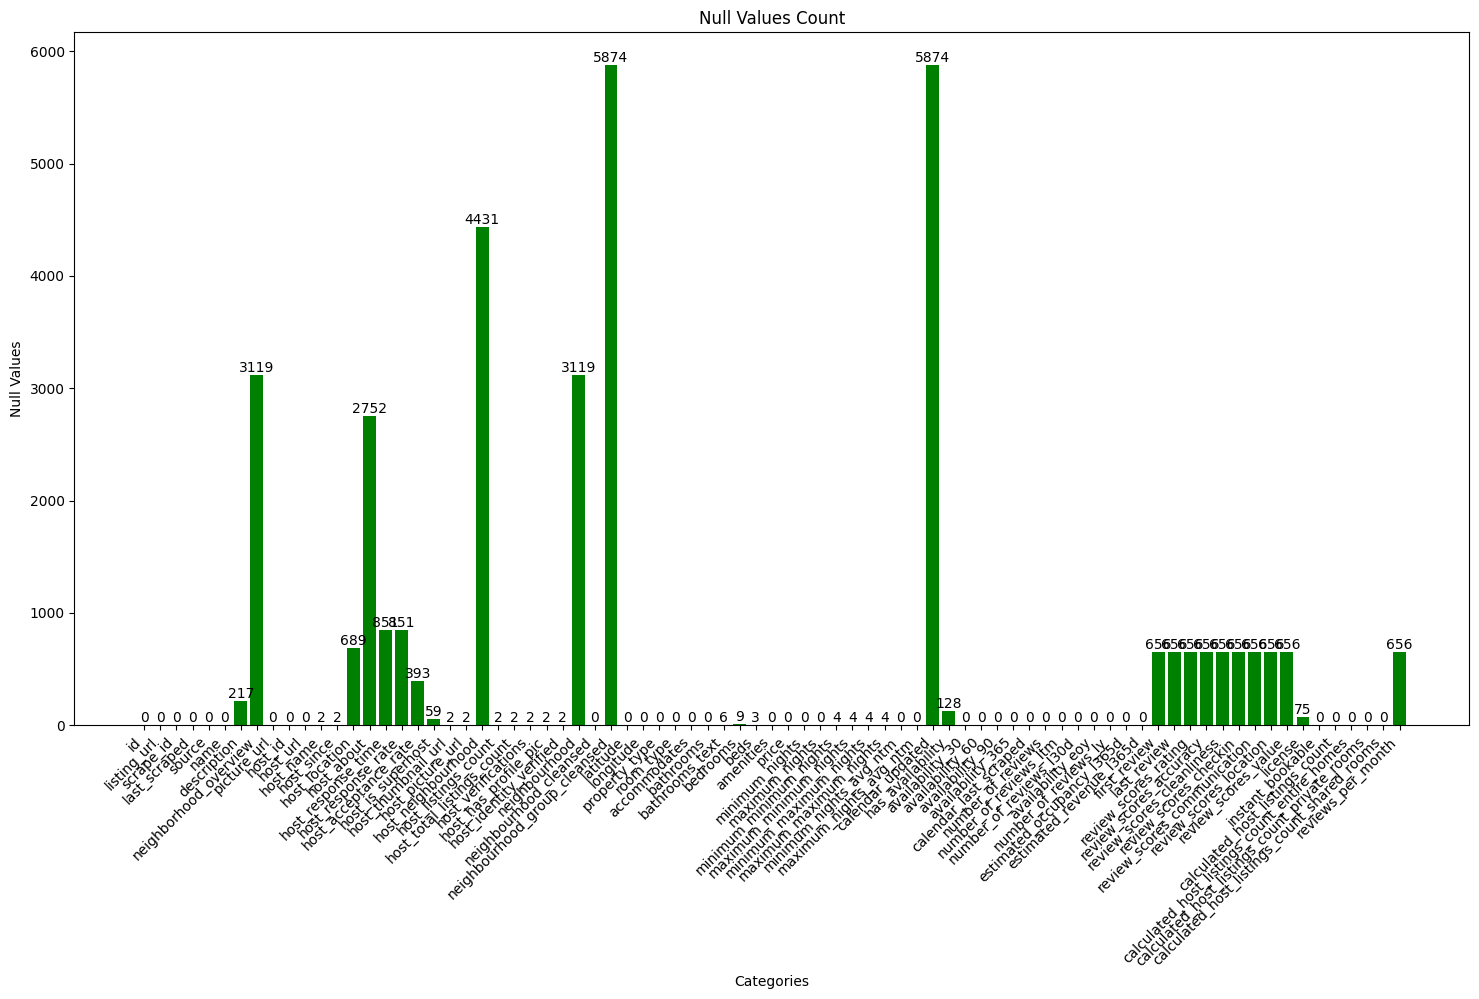

In [370]:
categories=categories_null_count.keys()
values=categories_null_count.values()

plt.figure(figsize=(18,9))
bars=plt.bar(categories, values, color='green')
plt.xlabel("Categories")
plt.ylabel("Null Values")
plt.xticks(rotation=45, ha='right')
plt.title("Null Values Count")

for i, bar in enumerate(bars):  # i=0→bar0, i=1→bar1, etc.
    height = bar.get_height()   # Gets values[i] for that bar
    plt.text(bar.get_x() + bar.get_width()/2, height,  # Centers on THIS bar
             f'{int(height)}', ha='center', va='bottom')

plt.show()

In [371]:
percentage_null_columns={}
col_40null=[]
for i in df.columns:
    null_pct=int(df[f"{i}"].isnull().sum())*100/5874
    percentage_null_columns.update({i: null_pct})
    if null_pct>40:
        col_40null.append(i)
col_40null 

['neighborhood_overview', 'host_about', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'calendar_updated']

In [372]:
df.columns 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [373]:
df.drop(["id","listing_url",'scrape_id','last_scraped','source','picture_url','host_id','host_url','host_thumbnail_url','host_picture_url','host_listings_count','neighbourhood_group_cleansed','calendar_updated','calendar_last_scraped','license','neighborhood_overview','host_about','host_neighbourhood','neighbourhood'], axis=1, inplace=True)

In [374]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 10479
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          5874 non-null   object 
 1   description                                   5657 non-null   object 
 2   host_name                                     5872 non-null   object 
 3   host_since                                    5872 non-null   object 
 4   host_location                                 5185 non-null   object 
 5   host_response_time                            5023 non-null   object 
 6   host_response_rate                            5023 non-null   object 
 7   host_acceptance_rate                          5481 non-null   object 
 8   host_is_superhost                             5815 non-null   object 
 9   host_total_listings_count                     5872 non-null   float

In [375]:
dataset_info = {
    "columns": [], "nulls": [], "floats": [], "ints": [], 
    "strs": [], "dates": [], "bools": [], "objects": []
}

for col in df.columns:
    # Count null values
    null_count = df[col].isnull().sum()
    
    # Get type distribution (handles NaN properly)
    type_counts = {}
    for value in df[col]:
        if pd.isna(value):
            type_counts['<NA>']=type_counts.get('<NA>',0)+1
        else:
            type_counts[str(type(value).__name__)]=type_counts.get(str(type(value).__name__),0)+1
    
    dataset_info['columns'].append(col)
    dataset_info['nulls'].append(null_count)
    dataset_info['floats'].append(type_counts.get('float', 0))
    dataset_info['ints'].append(type_counts.get('int', 0))
    dataset_info['strs'].append(type_counts.get('str', 0))
    dataset_info['dates'].append(type_counts.get('datetime', 0) + type_counts.get('Timestamp', 0))
    dataset_info['bools'].append(type_counts.get('bool', 0))
    dataset_info['objects'].append(type_counts.get('object', 0) + type_counts.get('NoneType', 0))

# Convert to DataFrame for easy viewing
info_df = pd.DataFrame(dataset_info)
info_df

,columns,nulls,floats,ints,strs,dates,bools,objects
0,name,0,0,0,5874,0,0,0
1,description,217,0,0,5657,0,0,0
2,host_name,2,0,0,5872,0,0,0
3,host_since,2,0,0,5872,0,0,0
4,host_location,689,0,0,5185,0,0,0
5,host_response_time,851,0,0,5023,0,0,0
6,host_response_rate,851,0,0,5023,0,0,0
7,host_acceptance_rate,393,0,0,5481,0,0,0
8,host_is_superhost,59,0,0,5815,0,0,0
9,host_total_listings_count,2,5872,0,0,0,0,0


The above data shows that some columns have null values also. 
But no columns has more than 1 datatype.

In [376]:
df.description.iloc[:30]

0     Stylish and romantic houseboat on fantastic hi...
1             Basic bedroom in the center of Amsterdam.
2     This room can also be rented as a single or a ...
5     Stylish & spacious 60m2 guest suite in Amsterd...
6     A beautiful 'De Lux' 125 sqm apartment for 4 a...
7     This is a beautiful family home in a lovely pa...
8     B&B “De 9 Straatjes” – Your home in the heart ...
15    Private room offered in elegant furnished, cle...
16    This lovely, three story monumental house is l...
21    Beautiful apartment in the peaceful "Amsterdam...
22    We would be delighted to host you in our guest...
23    Metropolitan B&B is a nice place in the centre...
25    This former artist's studio with bathroom take...
30    This unique property is a 16th century canal h...
31    Our lovely studio apartment is located near th...
33    You will have your own private floor with larg...
35    The apartment is part of our property on the g...
39    The apartment is a modern five bedroom apa

How to handle null values in the above case? (column name: description)\
So as the percentage of missing values is approx 4%, we must impute the null values with a string like "No description available". This will ensure that the machine understands cells with same type of descriptions and that they do convey something, as when we see that there is no description available for a listing, we basically don't prefer those listings and tend to book those very less often. So this underlying human behaviour can be understood by the machine as well. So when the machine will read this string "No description available" then it will understand that this cell does has some characteristic.

So I think that we can just impute the null values for above case with "No description avalable". 

In [377]:
df['description']=df['description'].fillna("No description available") 
df.description.isnull().sum()

np.int64(0)

In [378]:
idx=df[df["host_name"].isnull()]
idx

,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4478,Lovely comfortable bed&breakfast with canal view,Bright and welcoming canal-side apartment in t...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,...,4.54,4.77,4.91,4.66,f,1,0,1,0,0.75
9166,Spacious private garden floor,This spacious private garden floor is part of ...,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,...,4.95,4.95,4.95,4.90,f,1,0,1,0,6.72


In [379]:
df.loc[4475:4480]

,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4478,Lovely comfortable bed&breakfast with canal view,Bright and welcoming canal-side apartment in t...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,...,4.54,4.77,4.91,4.66,f,1,0,1,0,0.75
4480,Beautiful Amsterdam appartment by the water,This beautiful and cosy apartment is very spac...,Djinny,2015-07-22,"Amsterdam, Netherlands",within a few hours,80%,67%,f,4.0,...,5.00,4.77,4.77,4.77,f,1,1,0,0,0.28


For column "host_name" we can simply impute the missing column with the most frequent name or assign any random name in these cells, as there are only 2 null values in this column.  

In [380]:
# df['host_name'].fillna(df['host_name'].mode()[0], inplace=True)
df['host_name']=df['host_name'].fillna(df['host_name'].mode()[0]) 

In [381]:
idx=df[df['host_since'].isnull()]
idx

,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4478,Lovely comfortable bed&breakfast with canal view,Bright and welcoming canal-side apartment in t...,Stephan,NaN,NaN,NaN,NaN,NaN,f,NaN,...,4.54,4.77,4.91,4.66,f,1,0,1,0,0.75
9166,Spacious private garden floor,This spacious private garden floor is part of ...,Stephan,NaN,NaN,NaN,NaN,NaN,t,NaN,...,4.95,4.95,4.95,4.90,f,1,0,1,0,6.72


In [382]:
df['host_since']=df['host_since'].fillna(df['host_since'].mode()[0]) 

# here also we have imputed the null values with max occuring values in the column.

In [383]:
df['host_location']=df['host_location'].fillna(df['host_location'].mode()[0])

# here for the column 'host_location' we impute the null values with the location which has occurred max number of times. This column contains 13% of null values.

In [384]:
df['host_response_time'].iloc[:30]

0         within an hour
1         within an hour
2         within an hour
5     within a few hours
6         within an hour
7     a few days or more
8     within a few hours
15        within an hour
16        within an hour
21        within an hour
22        within an hour
23        within an hour
25        within an hour
30        within an hour
31          within a day
33          within a day
35        within an hour
39        within an hour
40        within an hour
41        within an hour
42    within a few hours
43    within a few hours
44                   NaN
45    within a few hours
46                   NaN
48    within a few hours
50        within an hour
51        within an hour
53    a few days or more
54        within an hour
Name: host_response_time, dtype: object

In [385]:
df['host_response_time'].value_counts()

host_response_time
within an hour        2456
within a few hours    1196
within a day          1065
a few days or more     306
Name: count, dtype: int64

As observed from the distribution from the above 'host_response_time' column there are 4 unique key words that actually repeat throughout the column.\
Each unique key-word has on an average of approx 1250 counts. And from our calculation we know that here are 851 cell which are just blank, so rather than imputting these blank cells with the value occuring max times, we must simply replace these null values with "not specified". 

In [386]:
df['host_response_time']=df['host_response_time'].fillna('not specified')

In [387]:
df['host_response_rate'].value_counts()

host_response_rate
100%    3690
0%       150
90%      125
50%      104
80%      101
        ... 
55%        1
36%        1
37%        1
64%        1
73%        1
Name: count, Length: 64, dtype: int64

In [388]:
df['host_response_rate']=df['host_response_rate'].fillna(df['host_response_rate'].mode()[0])

# As seen from the distribution, the 100% values is repeated max number of times so here we basically impute the null values with max occuring value.

In [391]:
df['host_acceptance_rate'].value_counts()

host_acceptance_rate
100%    1624
0%       372
50%      260
99%      193
67%      158
        ... 
37%        3
66%        2
49%        2
2%         1
1%         1
Name: count, Length: 101, dtype: int64

In [ ]:
df['host_acceptance_rate']=df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mode()[0])
df['host_is_superhost']=df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0])

# here also we do the same, simple impute the null values with max occuring values of these column.

In [ ]:
valuecounts=df['host_total_listings_count'].value_counts()
valuecounts 

host_total_listings_count
1.0       3207
2.0       1120
3.0        468
4.0        265
5.0        144
6.0        105
7.0         72
15.0        54
8.0         44
11.0        38
9.0         37
13.0        36
10.0        32
85.0        30
23.0        28
24.0        21
18.0        20
12.0        18
17.0        18
14.0        13
69.0        12
21.0        10
22.0        10
1655.0       9
45.0         8
40.0         6
19.0         6
16.0         5
35.0         5
48.0         5
42.0         4
44.0         3
63.0         3
221.0        2
94.0         2
1052.0       2
230.0        1
27.0         1
133.0        1
98.0         1
32.0         1
541.0        1
34.0         1
31.0         1
79.0         1
219.0        1
Name: count, dtype: int64

In [408]:
sum(valuecounts.iloc[:15])/15

378.6666666666667

In [409]:
df['host_total_listings_count']=df['host_total_listings_count'].fillna(378)

# here we impute the missing value with the average of top 15 value occurences.

In [412]:
df['host_verifications'].value_counts()

host_verifications
['email', 'phone']                  4716
['email', 'phone', 'work_email']     605
['phone']                            521
['phone', 'work_email']               24
[]                                     3
['email']                              2
['email', 'work_email']                1
Name: count, dtype: int64

In [ ]:
df['host_verifications']=df['host_verifications'].fillna(df['host_verifications'].mode()[0])

# As there are only 2 null values we simple impute them with max occuring value.